### Problem statement

3*3 grid \
Indexing 0-8 


Fish (+1 reward) on 4,6\
Death (-10 reward) and termination on 5 \
Finish and +10 reward on 8 \
-0.1 reward (can change later if we get no termination) for each step taken. 


Start at 0 \
4 actions: u,d,l,r  \
Each action has 0.25 prob initially.  


After action is decided, 0.5 prob that we take one step in that direction and 0.5 that we slip and take 2 steps in that  direction.

In [1]:
# Difference between forward and backward T -D learning
%autosave 5

Autosaving every 5 seconds


### Environment Creation of Given respective game

In [2]:
import random
import numpy as np

class Action:
    def __init__(self):
        self.L=0
        self.R=1
        self.U=2
        self.D=3
    def check(self):
        pass

class Environment:
    def __init__(self):
        self.action_space=4
        self.observation_space=9
        self.state=1
        self.done=False
        self.reward=[[0,0,0],[0,1,-10],[1,0,10]]
        
    def reset(self):
        self.state=0
        return self.state
        
    def sample(self):
        return np.random.choice([0,1,2,3],p=[0.25,0.25,0.25,0.25])
    
    def step(self,action):
        self.Reward=0
        Act=Action()
        if(self.state==0):
            if(action==Act.L):
                self.state=np.random.choice([1,2],p=[0.5,0.5])
                if(self.state==2):
                    self.Reward=self.reward[0][self.state] -0.1
                else:
                    self.Reward=self.reward[0][self.state] -0.2
                self.done=False
                
            elif (action==Act.R):
                self.state=np.random.choice([1,2],p=[0.5,0.5])
                if(self.state==2):
                    self.Reward=self.reward[0][self.state] -0.1
                else:
                    self.Reward=self.reward[0][self.state] -0.2
                self.done=False
                
                
            elif(action==Act.U):
                self.state=np.random.choice([3,6],p=[0.5,0.5])
                if self.state==3:
                    self.Reward=self.reward[1][0] -0.2
                else :
                    self.Reward=self.reward[2][0] -0.1
                self.done=False
                
            elif(action==Act.D):
                self.state=np.random.choice([3,6],p=[0.5,0.5])
                if self.state==3:
                    self.Reward=self.reward[1][0] -0.1
                else :
                    self.Reward=self.reward[2][0] -0.2
                self.done=False
                
        elif(self.state==1):
            if(action==Act.L):
                self.state=np.random.choice([0,2],p=[0.5,0.5])
                if(self.state==2):
                    self.Reward=self.reward[0][self.state] -0.2
                else:
                    self.Reward=self.reward[0][self.state] -0.1
                self.done=False
                
            elif (action==Act.R):
                self.state=np.random.choice([0,2],p=[0.5,0.5])
                if(self.state==2):
                    self.Reward=self.reward[0][self.state] -0.1
                else:
                    self.Reward=self.reward[0][self.state] -0.2
                self.done=False
                
                
            elif(action==Act.U):
                self.state=np.random.choice([4,7],p=[0.5,0.5])
                if self.state==4:
                    self.Reward=self.reward[1][1] -0.2
                else :
                    self.Reward=self.reward[2][1] -0.1
                self.done=False
                
            elif(action==Act.D):
                self.state=np.random.choice([4,7],p=[0.5,0.5])
                if self.state==4:
                    self.Reward=self.reward[1][1] -0.1
                else :
                    self.Reward=self.reward[2][1] -0.2
                self.done=False
                
        elif(self.state==2):
            if(action==Act.L):
                self.state=np.random.choice([1,0],p=[0.5,0.5])
                if(self.state==1):
                    self.Reward=self.reward[0][self.state] -0.1
                else:
                    self.Reward=self.reward[0][self.state] -0.2
                self.done=False
                
            elif (action==Act.R):
                self.state=np.random.choice([1,0],p=[0.5,0.5])
                if(self.state==0):
                    self.Reward=self.reward[0][self.state] -0.1
                else:
                    self.Reward=self.reward[0][self.state] -0.2
                self.done=False
                
                
            elif(action==Act.U):
                self.state=np.random.choice([5,8],p=[0.5,0.5])
                if self.state==5:
                    self.Reward=self.reward[1][2] 
                else :
                    self.Reward=self.reward[2][2] 
                self.done=True
                
            elif(action==Act.D):
                self.state=np.random.choice([5,8],p=[0.5,0.5])
                if self.state==5:
                    self.Reward=self.reward[1][2] 
                else :
                    self.Reward=self.reward[2][2] 
                self.done=True
                
        elif(self.state==3):
            if(action==Act.L):
                self.state=np.random.choice([5,4],p=[0.5,0.5])
                if(self.state==5):
                    self.Reward=self.reward[1][2] 
                    self.done=True
                else:
                    self.Reward=self.reward[1][1] -0.2
                    self.done=False
                
            elif (action==Act.R):
                self.state=np.random.choice([5,4],p=[0.5,0.5])
                if(self.state==4):
                    self.Reward=self.reward[1][1] -0.1
                    self.done=False
                else:
                    self.Reward=self.reward[1][2] 
                    self.done=True
                
                
            elif(action==Act.U):
                self.state=np.random.choice([0,6],p=[0.5,0.5])
                if self.state==6:
                    self.Reward=self.reward[2][0] -0.2
                else :
                    self.Reward=self.reward[0][0] -0.1
                self.done=False
                
            elif(action==Act.D):
                self.state=np.random.choice([0,6],p=[0.5,0.5])
                if self.state==6:
                    self.Reward=self.reward[2][0] -0.1
                else :
                    self.Reward=self.reward[0][0] -0.2
                self.done=False
                   
        elif(self.state==4):
            if(action==Act.L):
                self.state=np.random.choice([5,3],p=[0.5,0.5])
                if(self.state==5):
                    self.Reward=self.reward[1][2] 
                    self.done=True
                else:
                    self.Reward=self.reward[1][0] -0.2
                    self.done=False
                
            elif (action==Act.R):
                self.state=np.random.choice([5,3],p=[0.5,0.5])
                if(self.state==3):
                    self.Reward=self.reward[1][0] -0.1
                    self.done=False
                else:
                    self.Reward=self.reward[1][2] 
                    self.done=True
                
                
            elif(action==Act.U):
                self.state=np.random.choice([1,7],p=[0.5,0.5])
                if self.state==7:
                    self.Reward=self.reward[2][1] -0.2
                else :
                    self.Reward=self.reward[0][1] -0.1
                self.done=False
                
            elif(action==Act.D):
                self.state=np.random.choice([1,7],p=[0.5,0.5])
                if self.state==7:
                    self.Reward=self.reward[2][1] -0.1
                else :
                    self.Reward=self.reward[0][1] -0.2
                self.done=False
                
        elif(self.state==6):
            if(action==Act.L):
                self.state=np.random.choice([7,8],p=[0.5,0.5])
                if(self.state==8):
                    self.Reward=self.reward[2][2] 
                    self.done=True
                else:
                    self.Reward=self.reward[2][1] -0.2
                    self.done=False
                
            elif (action==Act.R):
                self.state=np.random.choice([7,8],p=[0.5,0.5])
                if(self.state==7):
                    self.Reward=self.reward[2][1] -0.1
                    self.done=False
                else:
                    self.Reward=self.reward[2][2] 
                    self.done=True
                
                
            elif(action==Act.U):
                self.state=np.random.choice([0,3],p=[0.5,0.5])
                if self.state==3:
                    self.Reward=self.reward[1][0] -0.1
                else :
                    self.Reward=self.reward[0][0] -0.2
                self.done=False
                
            elif(action==Act.D):
                self.state=np.random.choice([0,3],p=[0.5,0.5])
                if self.state==0:
                    self.Reward=self.reward[0][0] -0.1
                else :
                    self.Reward=self.reward[1][0] -0.2
                self.done=False
                
        elif(self.state==7):
            if(action==Act.L):
                self.state=np.random.choice([6,8],p=[0.5,0.5])
                if(self.state==6):
                    self.Reward=self.reward[2][0] -0.1
                    self.done=False
                else:
                    self.Reward=self.reward[2][2] 
                    self.done=True
                
            elif (action==Act.R):
                self.state=np.random.choice([6,8],p=[0.5,0.5])
                if(self.state==8):
                    self.Reward=self.reward[2][2] 
                    self.done=True
                else:
                    self.Reward=self.reward[2][0] -0.2
                    self.done=False
                
                
            elif(action==Act.U):
                self.state=np.random.choice([1,4],p=[0.5,0.5])
                if self.state==4:
                    self.Reward=self.reward[1][1] -0.1
                else :
                    self.Reward=self.reward[0][1] -0.2
                self.done=False
                
            elif(action==Act.D):
                self.state=np.random.choice([1,4],p=[0.5,0.5])
                if self.state==0:
                    self.Reward=self.reward[0][1] -0.1
                else :
                    self.Reward=self.reward[1][1] -0.2
                self.done=False
                
        return self.state,self.Reward,self.done
                       

### Human Playing game

In [ ]:
env = Environment()
state = env.reset()
total_reward = 0
while True:
    action = int(input("Enter a direction: 0 (LEFT), 1 (RIGHT), 2 (UP), 3(DOWN) ->"))
    state,reward,done = env.step(action)
    total_reward  += reward;
    print("Your new state is ", state)
    print("Your current reward is", reward )
    print("Your Total reward is", total_reward )
    if(done):
        print("You entered the termination")
        break

Enter a direction: 0 (LEFT), 1 (RIGHT), 2 (UP), 3(DOWN) ->0
Your new state is  2
Your current reward is -0.1
Your Total reward is -0.1
Enter a direction: 0 (LEFT), 1 (RIGHT), 2 (UP), 3(DOWN) ->1
Your new state is  1
Your current reward is -0.2
Your Total reward is -0.30000000000000004
Enter a direction: 0 (LEFT), 1 (RIGHT), 2 (UP), 3(DOWN) ->2
Your new state is  7
Your current reward is -0.1
Your Total reward is -0.4
Enter a direction: 0 (LEFT), 1 (RIGHT), 2 (UP), 3(DOWN) ->1
Your new state is  6
Your current reward is 0.8
Your Total reward is 0.4
Enter a direction: 0 (LEFT), 1 (RIGHT), 2 (UP), 3(DOWN) ->1
Your new state is  8
Your current reward is 10
Your Total reward is 10.4
You entered the termination


### Monte-Carlo Control Training 

In [3]:
class MC_agent:
    def __init__(self,enviroment):
        
        self.num_episodes=6000
        
        self.max_steps_per_episode = 20000
        
        #self.n0 = float(n0)
        
        self.env = enviroment
        
        self.rewards_all_episodes = []

        # N(s,a) is the number of times that action a has been selected from state s.
        self.N = np.zeros((self.env.observation_space,self.env.action_space))
        
        # Q-table for Q(s,a)
        self.Q = np.zeros((self.env.observation_space,self.env.action_space))
        
    def train(self):
        
        # Loop episodes
        for episode in range(1,self.num_episodes+1):
            
            
            #for storing each state, action pair in each step of episodes
            episode_pairs = []
            
            # get initial state for current episode
            state = self.env.reset()
            
            rewards_current_episode = 0
            
            done = False
            
            for step in range(self.max_steps_per_episode):
                
                # get optimal action, with epsilon exploration (epsilon dependent on number of visits to the state)
                # ε-greedy exploration strategy with εt = N0/(N0 + N(st))
                # n_visits = sum(self.N[state, :])
                # epsilon = N0/(N0 + N(st))
                #curr_epsilon = self.n0 / (self.n0 + n_visits)
                
                # we are using this curr_epsilon=1/k  where k=episode
                curr_epsilon=1/episode

                # epsilon greedy policy exploration
                if np.random.uniform(0, 1) < curr_epsilon:
                    action = self.env.sample()
                    
                else:
                    action = np.argmax(self.Q[state,:]) 
               
                # store action state pairs
                episode_pairs.append((state,action))
                
                # update visits
                # N(s,a) is the number of times that action a has been selected from state s. 
                self.N[state, action] += 1
                
                # execute action
                state,reward,done = self.env.step(action)
                
                rewards_current_episode += reward
                
                # when game ends
                if(done == True):
                    break
             
            self.rewards_all_episodes.append(rewards_current_episode)

            # Update Action value function accordingly
            for curr_state, curr_action in episode_pairs:
                
                # Alpha(learning rate)
                step = 1.0 / self.N[curr_state, curr_action]   
            
                error = rewards_current_episode - self.Q[curr_state, curr_action]
                
                self.Q[curr_state, curr_action] += step * error
                
    def showing_and_storing_q_val(self):
        
        print("\n\n********Q-table********\n")
        print(self.Q)
        #Saving Q table
        np.save('q_table_for_monti_carlo',self.Q)
        
    def accuracy(self):
        rewards_per_thousand_episodes = np.split(np.array(self.rewards_all_episodes),self.num_episodes/1000)
        count = 1000

        print("********Average reward per thousand episodes********\n")
        for r in rewards_per_thousand_episodes:
            print(count, ": ", str(sum(r/1000)))
            count += 1000
                

In [ ]:
agent = MC_agent(Environment())
agent.train()
agent.showing_and_storing_q_val()
agent.accuracy()



********Q-table********

[[2546.23115952 3144.0354303  2791.88778153 3350.47641501]
 [2947.9573761  2198.73646393 4595.20215581 3905.35059604]
 [ -16.98834019 3268.69494446  526.05        -11.        ]
 [2285.88244889 2294.66634662 3350.79835616 2600.88531565]
 [2784.92454523 2829.22905799 2649.49499962 4595.43174236]
 [   0.            0.            0.            0.        ]
 [2065.55146866 2289.23689916 2774.39425894 3351.17752884]
 [2757.04223053 2861.46758641 3687.26073468 4595.19173888]
 [   0.            0.            0.            0.        ]]
********Average reward per thousand episodes********

1000 :  719.7522000000271
2000 :  1939.3215000002372
3000 :  2516.077200000405
4000 :  2978.4487000005242
5000 :  3109.1748000005928
6000 :  3391.3052000006855


### The Code To Watch The Agent Play The Game

In [ ]:
q_table=np.load('q_table_for_monti_carlo.npy')

In [ ]:
import time
from IPython.display import clear_output

env= Environment()
for episode in range(1):
    Total_reward=0
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n")
    while True:        
        action = np.argmax(q_table[state,:])        
        new_state, reward, done= env.step(action)
        if(action==0):
            print("You Took action in direction Left Ward 🠔")
            
        elif(action==1):
            print("You Took action in direction Right Ward  ➜ ")
            
        elif(action==3):
            print("You Took action in direction Upward Ward 🠕")
            
        else:
            print("You Took action in direction Down Ward 🠗 ")
            
            
        print("You are moving ",state,"->",new_state,"\n")
        
        Total_reward=Total_reward+reward
        if done:
            if new_state == 8:
                print("****You reached the goal!****")
                print("Total Reward  of EPISODE ",episode+1," is ",Total_reward,"\n")

            else:
                print("****You fell through a hole!****")
                print("Total Reward  of EPISODE ",episode+1," is ",Total_reward,"\n")

            break
            
        state = new_state
        


### T-D( lambada) Control Training

In [4]:
class Sarsa_Agent:
    
    def __init__(self, environment, mlambda):
        #during chossing appropriate  λ value
        #self.num_episodes=1000
        
        # For best  λ carring agent
        self.num_episodes=6000
        self.max_steps_per_episode = 20000
        #self.n0 = float(n0)
        
        self.env = environment
        self.mlambda = mlambda
        
        # N(s) is the number of times that state s has been visited
        # N(s,a) is the number of times that action a has been selected from state s.
        self.N = np.zeros((self.env.observation_space,
                           self.env.action_space))
        
        self.Q = np.zeros((self.env.observation_space,
                           self.env.action_space))
        
        self.rewards_all_episodes = []
        

    # get optimal action, with epsilon exploration (epsilon dependent on number of visits to the state)
    # ε-greedy exploration strategy with εt = N0/(N0 + N(st)), 
    def train_get_action(self, state,episode):

        #n_visits = sum(self.N[state, :])       

        # epsilon = N0/(N0 + N(st))
        #curr_epsilon = self.n0 / (self.n0 + n_visits)
        
        # we are using this curr_epsilon=1/k  where k=episode
        curr_epsilon = 1/episode
        # epsilon greedy policy
        if np.random.uniform(0, 1) < curr_epsilon:
            action = self.env.sample()
            return action
        else:
            action = np.argmax(self.Q[state, :])
            return action


    def train(self):        
        
        # Loop episodes
        for episode in range(1,self.num_episodes+1):
            
            self.E =np.zeros((self.env.observation_space, self.env.action_space))
            
            self.current_reward=0
            # get initial state for current episode
            state = self.env.reset()
            action = self.train_get_action(state,episode)
            action_next = action
            done=False
            # Execute until game ends
            for step in range(self.max_steps_per_episode):
                # update visits
                
                self.N[state, action] += 1
                
                # execute action
                state_next, reward,done = self.env.step(action)
                
                self.current_reward+=reward
                q_value = self.Q[state, action]
                                
                if not done:
                    # choose next action with epsilon greedy policy
                    action_next = self.train_get_action(state_next,episode)
                    
                    next_q_value= self.Q[state_next, action_next]
                    delta = reward + next_q_value - q_value
                else:
                    delta = reward - q_value

                
                self.E[state, action] += 1
                alpha = 1.0  / (self.N[state, action])
                
                update = alpha * delta * self.E
                self.Q += update
                self.E *= self.mlambda

                # reassign s and a
                state = state_next
                action =  action_next
                
                if(done==True):
                    break
            
            self.rewards_all_episodes.append(self.current_reward) 

    def showing_and_storing_q_val(self):
        
        print("\n\n********Q-table********\n")
        print(self.Q)
        #Saving Q table
        np.save('q_table_for_TD_learning',self.Q)
        
    def accuracy(self):
        rewards_per_thousand_episodes = np.split(np.array(self.rewards_all_episodes),self.num_episodes/1000)
        count = 1000

        print("********Average reward per thousand episodes********\n")
        for r in rewards_per_thousand_episodes:
            print(count, ": ", str(sum(r/1000)))
            count += 1000
        
                

## Choosing best λ On the basis of mean- squared error.
**Stop each run after 1000 episodes and report the best Q(s,a)on the basis of  mean-squared error over all states and actions with the given respective lambda, comparing the true values Q∗(s,a)(Monti Carlo computed in the previous section with the estimated values Q(s, a) computed by Sarsa.**

In [7]:
mc_agent_Q_table=np.load('q_table_for_monti_carlo.npy')

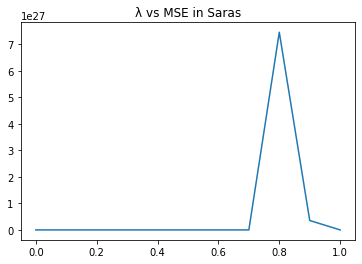

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

lambdas = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
agent_list = []
sme_list = []
n_elements = mc_agent_Q_table.shape[0]*mc_agent_Q_table.shape[1]*2
for l in lambdas:
    agent = Sarsa_Agent(Environment(),l)
    agent_list.append(l)
    agent.train()
    sme = np.sum(np.square(agent.Q-mc_agent_Q_table))/float(n_elements)
    sme_list.append(sme)

plt.title("λ vs MSE in Saras")
plt.plot(agent_list,sme_list)

##### So the appropriate lambda value is less than 0.7 lets choose 0.6

In [5]:
lambda_value = 0.6
agent =Sarsa_Agent(Environment(),lambda_value)
agent.train()
agent.showing_and_storing_q_val()
agent.accuracy()



********Q-table********

[[-2.11490025e+00  3.64739840e+03  0.00000000e+00 -6.54052323e-01]
 [ 1.65215781e+03  1.58339230e+03  1.08246054e+04  5.48897453e+03]
 [ 3.60474362e+00  3.26627717e+03  2.55813953e+00 -1.00000000e+01]
 [-1.00000000e+01 -1.00000000e+01  1.25357935e+03  0.00000000e+00]
 [ 4.58200317e+02  4.72757455e+02  5.48497502e+03  1.08269072e+04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.39054473e+03  1.26595164e+01  6.93300520e+00  8.48882580e+02]
 [ 8.54490120e+02  3.29368484e+02  5.37760641e+03  1.09576395e+04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
********Average reward per thousand episodes********

1000 :  10.113500000000037
2000 :  10.532100000000053
3000 :  2473.1994000002956
4000 :  3750.7480000004693
5000 :  4237.569400000548
6000 :  4435.703500000569


### The Code To Watch The Agent Play The Game

In [6]:
q_table=np.load('q_table_for_TD_learning.npy')

In [ ]:
import time
from IPython.display import clear_output

env= Environment()
for episode in range(9):
    Total_reward=0
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n")
    while True:        
        action = np.argmax(q_table[state,:])        
        new_state, reward, done= env.step(action)
        if(action==0):
            print("You Took action in direction Left Ward 🠔")
            
        elif(action==1):
            print("You Took action in direction Right Ward  ➜ ")
            
        elif(action==3):
            print("You Took action in direction Upward Ward 🠕")
            
        else:
            print("You Took action in direction Down Ward 🠗 ")
            
            
        print("You are moving ",state,"->",new_state,"\n")
        
        Total_reward=Total_reward+reward
        if done:
            if new_state == 8:
                print("****You reached the goal!****")
                print("Total Reward  of EPISODE ",episode+1," is ",Total_reward,"\n")

            else:
                print("****You fell through a hole!****")
                print("Total Reward  of EPISODE ",episode+1," is ",Total_reward,"\n")

            break
            
        state = new_state
        
